<a href="https://colab.research.google.com/github/XianPearl/CricketShotClassification/blob/main/UmpireActionClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install Dependencies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D,Flatten,Dense
from tensorflow.keras.models import Sequential
!pip install visualkeras
import visualkeras

**Mounting Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
zip_kaggle = zipfile.ZipFile('/content/drive/MyDrive/cricket-umpires-action-classification.zip', 'r')
zip_kaggle.extractall('/cricket-umpires-action-classification')
zip_kaggle.close()

Mounted at /content/drive


**Extracting the images**

In [ ]:
train_directory = "/cricket-umpires-action-classification/umpire/train"
test_directory = "/cricket-umpires-action-classification/umpire/test"

In [ ]:
def path_label_df(directory):

    """
    returns dataframe of images paths and class labels in a dirctory
    """
    image_path = []
    class_label = []

    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            img_path = os.path.join(directory, filename)
            class_name = filename.split("_")[:-1]
            class_name = ' '.join(class_name)

            image_path.append(img_path)
            class_label.append(class_name)

    return pd.DataFrame({'image_path':image_path,'class_label':class_label})

In [ ]:
train_df = path_label_df(train_directory)
test_df = path_label_df(test_directory)
print(train_df)
print(test_df)

                                            image_path class_label
0    /cricket-umpires-action-classification/umpire/...        wide
1    /cricket-umpires-action-classification/umpire/...        wide
2    /cricket-umpires-action-classification/umpire/...         out
3    /cricket-umpires-action-classification/umpire/...        wide
4    /cricket-umpires-action-classification/umpire/...   no action
..                                                 ...         ...
307  /cricket-umpires-action-classification/umpire/...         out
308  /cricket-umpires-action-classification/umpire/...   no action
309  /cricket-umpires-action-classification/umpire/...     no ball
310  /cricket-umpires-action-classification/umpire/...   no action
311  /cricket-umpires-action-classification/umpire/...       sixes

[312 rows x 2 columns]
                                           image_path class_label
0   /cricket-umpires-action-classification/umpire/...       sixes
1   /cricket-umpires-action-classificati

**Pre-processing and Validating Data**

In [ ]:
datagen = ImageDataGenerator(rescale=1./255)
print('Training images: ')
train_data = datagen.flow_from_dataframe(train_df,
                                         x_col='image_path',
                                         y_col='class_label',
                                         target_size=(224, 224),
                                         batch_size = 32,
                                         class_mode = 'categorical'
                                        )

print('Testing images: ')
test_data = datagen.flow_from_dataframe(test_df,
                                       x_col='image_path',
                                       y_col='class_label',
                                       target_size=(224, 224),
                                       batch_size = 32,
                                       class_mode = 'categorical')

Training images: 
Found 312 validated image filenames belonging to 5 classes.
Testing images: 
Found 78 validated image filenames belonging to 5 classes.


**CNN Model**

In [ ]:
#Createmodel
model = Sequential([
    #Tiny VGG Model
    Conv2D(10,3,activation='relu', input_shape=(224,224,3)),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(5,activation='softmax')
              ])
#Compile the model
model.compile(loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

**Visualizing Model**

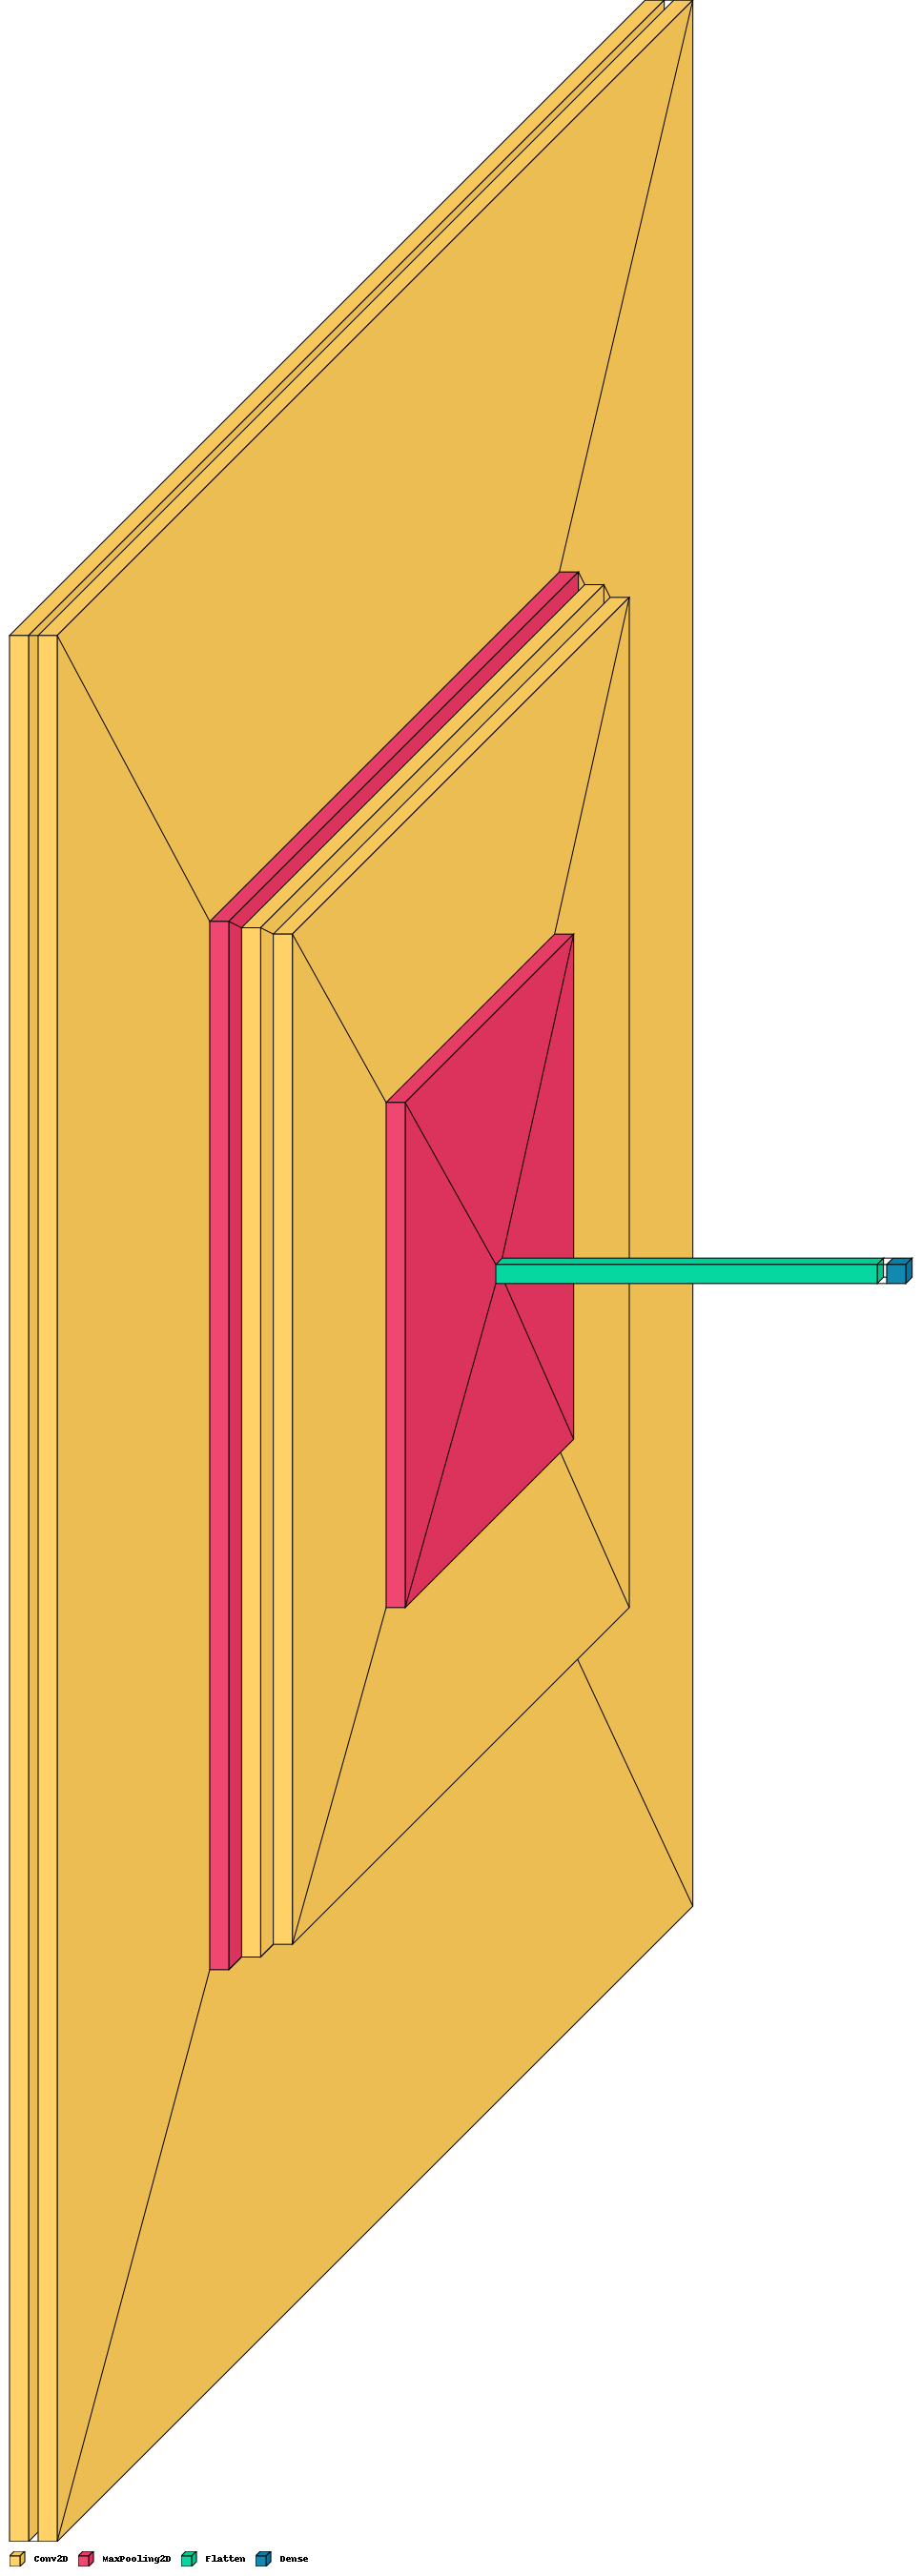

In [ ]:
visualkeras.layered_view(model,scale_xy=10,legend=True)

In [ ]:
# get the summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

**Compiling and Training the Model**

In [ ]:
history = model.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data = test_data,
                       validation_steps=len(test_data))

Epoch 1/5
10/10 [==============================] - 24s 2s/step - loss: 2.3982 - accuracy: 0.1923 - val_loss: 1.5714 - val_accuracy: 0.4487
Epoch 2/5
10/10 [==============================] - 22s 2s/step - loss: 1.5329 - accuracy: 0.3462 - val_loss: 1.5439 - val_accuracy: 0.3205
Epoch 3/5
10/10 [==============================] - 23s 2s/step - loss: 1.4162 - accuracy: 0.5417 - val_loss: 1.4684 - val_accuracy: 0.4615
Epoch 4/5
10/10 [==============================] - 23s 2s/step - loss: 1.2233 - accuracy: 0.5897 - val_loss: 1.3461 - val_accuracy: 0.4615
Epoch 5/5
10/10 [==============================] - 25s 3s/step - loss: 0.9675 - accuracy: 0.6218 - val_loss: 1.1836 - val_accuracy: 0.5641


**Plotting the Curve**

In [ ]:
def plot_loss_curve(history):
    """
    Returns loss curves of training and validation metrics
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    plt.figure(figsize=(15,5))

    plt.subplot(1,2,1)
    plt.plot(epochs, loss, label='loss')
    plt.plot(epochs, val_loss, label='validation loss')
    plt.title('loss curves')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(epochs,accuracy, label='accuracy')
    plt.plot(epochs, val_accuracy, label='validation accuracy')
    plt.title('accuracy curves')
    plt.legend()

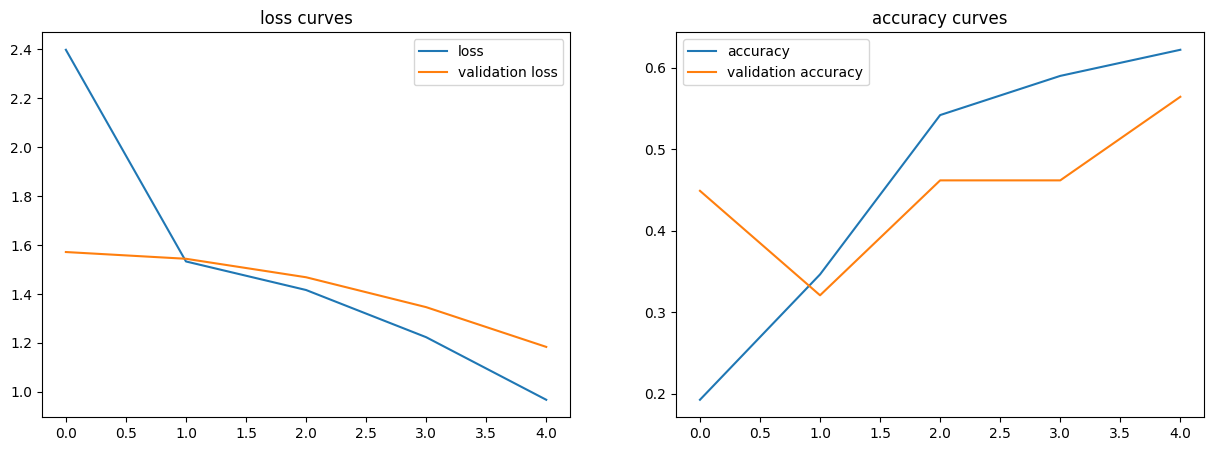

In [ ]:
plot_loss_curve(history)

**Direct links to ResNet Model and EfficientNet Model (Both being CNN Models)**

In [ ]:
efficientnet_url = 'https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1'
resnet_url = 'https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5'

**Creation of ResNet Model**

In [ ]:
import tensorflow_hub as hub

def create_model(model_url, num_class=5):

    """
    Take a tensorflow HUB URL and create a Squential model with it.
    """
    feature_extraction_layer = hub.KerasLayer(model_url,
                                             trainable = False,
                                             name = 'featue_extraction_layer',
                                            input_shape = (224,224,3))
    model = tf.keras.Sequential([
        feature_extraction_layer,
        Dense(num_class, activation = 'softmax', name='output_layer')

    ])

    return model

In [ ]:
resnet_model = create_model(resnet_url)

In [ ]:
resnet_model.compile(loss= 'categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics = ['accuracy']
                    )

**Visualizing the ResNet Model**

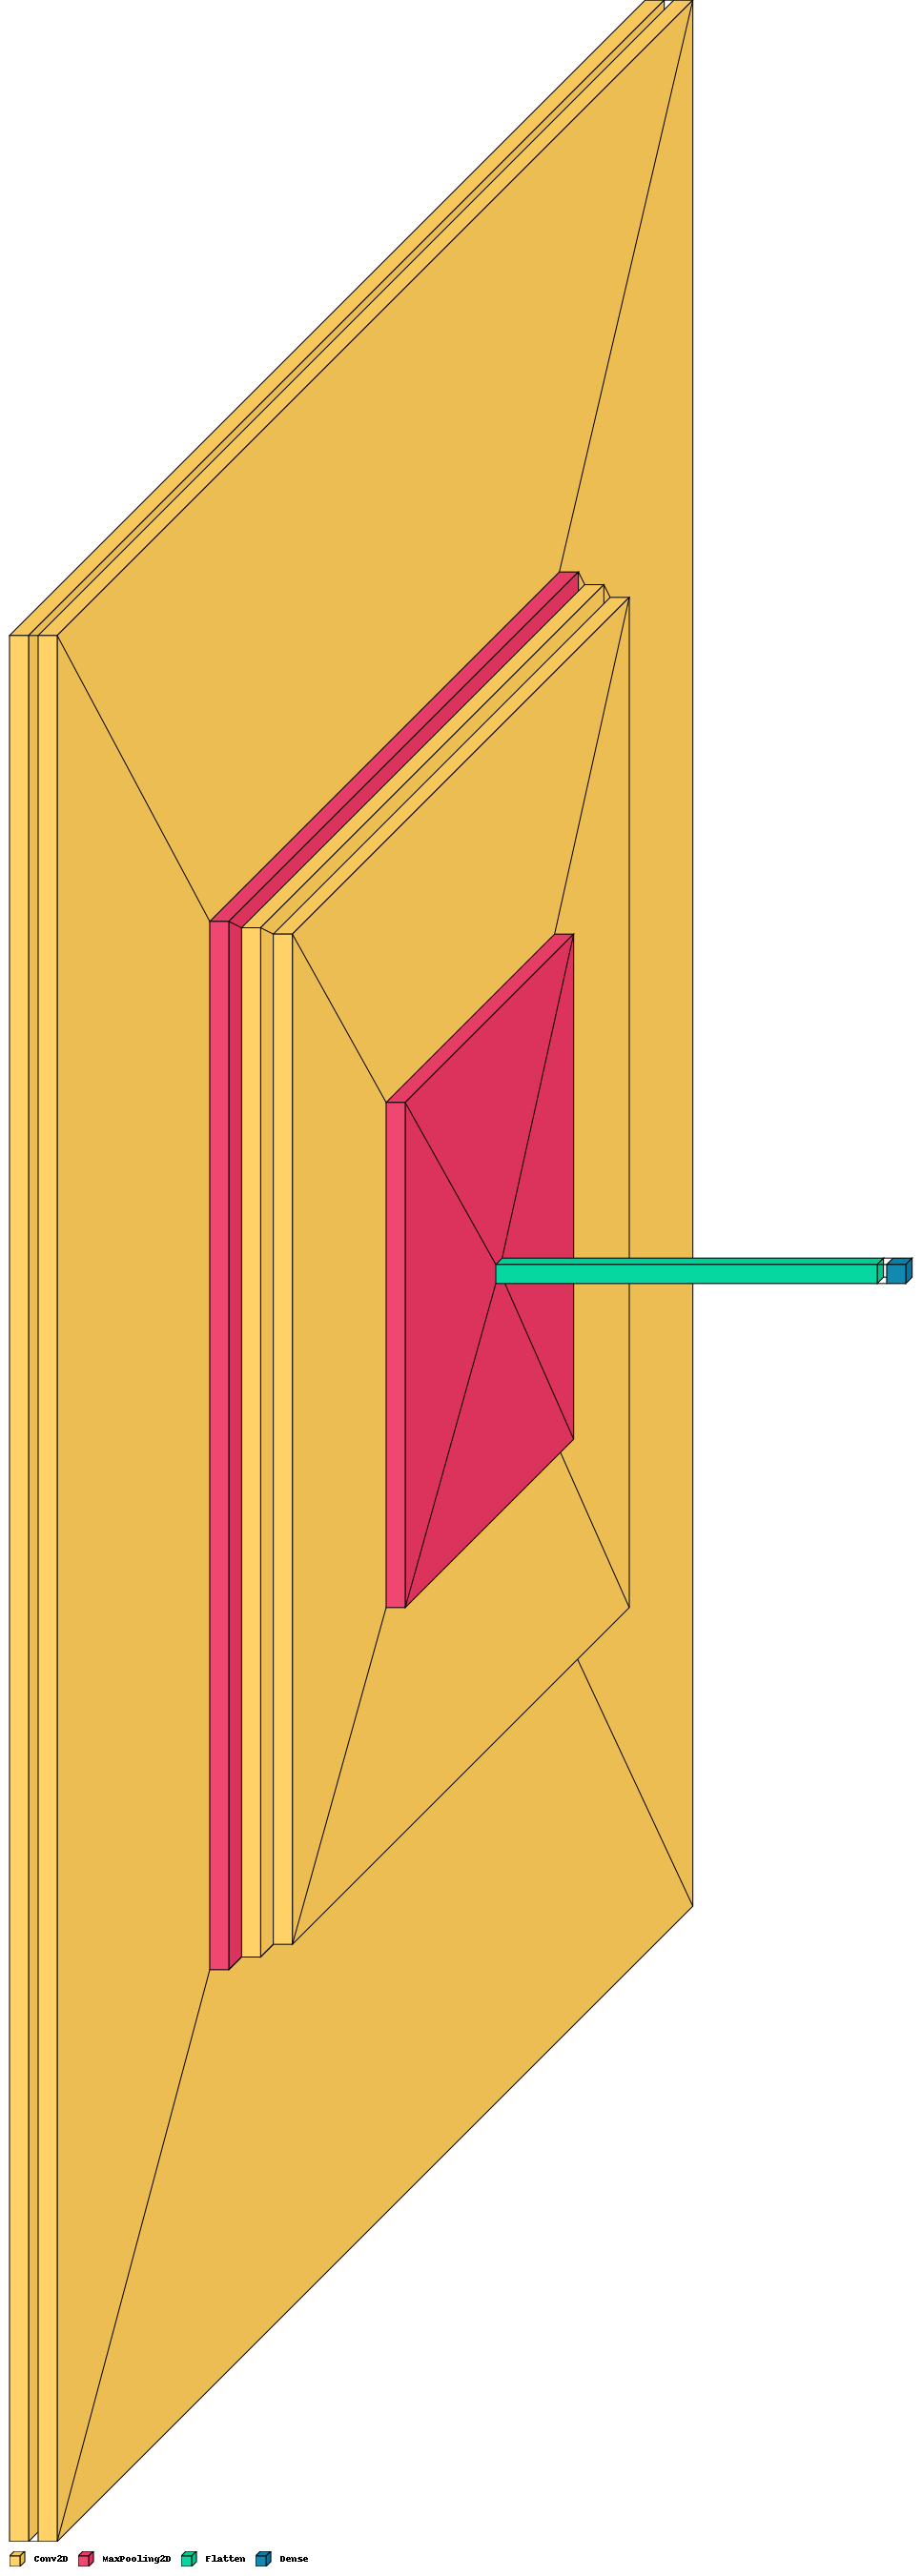

In [ ]:
visualkeras.layered_view(model,scale_xy=10,legend=True)

In [ ]:
resnet_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 featue_extraction_layer (K  (None, 2048)              23564800  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 5)                 10245     
                                                                 
Total params: 23575045 (89.93 MB)
Trainable params: 10245 (40.02 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


In [ ]:
resnet_history = resnet_model.fit(train_data,
                epochs = 5,
                steps_per_epoch=len(train_data),
                validation_data = test_data,
                validation_steps=len(test_data))

Epoch 1/5
10/10 [==============================] - 71s 7s/step - loss: 1.6445 - accuracy: 0.3109 - val_loss: 1.3815 - val_accuracy: 0.4615
Epoch 2/5
10/10 [==============================] - 72s 7s/step - loss: 0.9950 - accuracy: 0.6410 - val_loss: 1.1461 - val_accuracy: 0.4872
Epoch 3/5
10/10 [==============================] - 73s 8s/step - loss: 0.7337 - accuracy: 0.7468 - val_loss: 1.0452 - val_accuracy: 0.6154
Epoch 4/5
10/10 [==============================] - 74s 7s/step - loss: 0.5671 - accuracy: 0.8205 - val_loss: 0.9294 - val_accuracy: 0.6667
Epoch 5/5
10/10 [==============================] - 64s 7s/step - loss: 0.4534 - accuracy: 0.8750 - val_loss: 0.9215 - val_accuracy: 0.6923


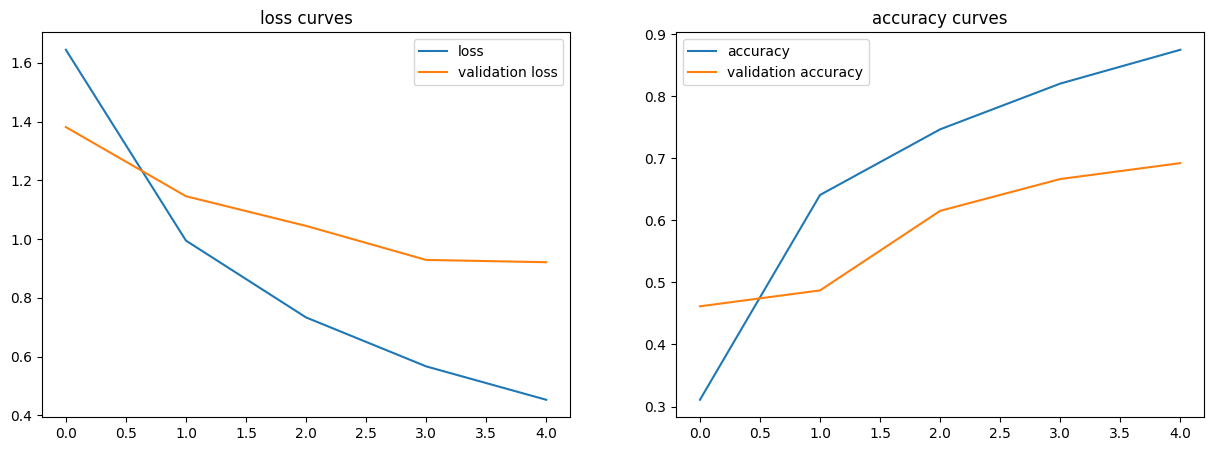

In [ ]:
plot_loss_curve(resnet_history)

**Creation of EfficientNet Model**

In [ ]:
efficientnet_model = create_model(efficientnet_url)

In [ ]:
efficientnet_model.compile(loss= 'categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics = ['accuracy']
                    )

**Visualizing the EfficientNet Model**

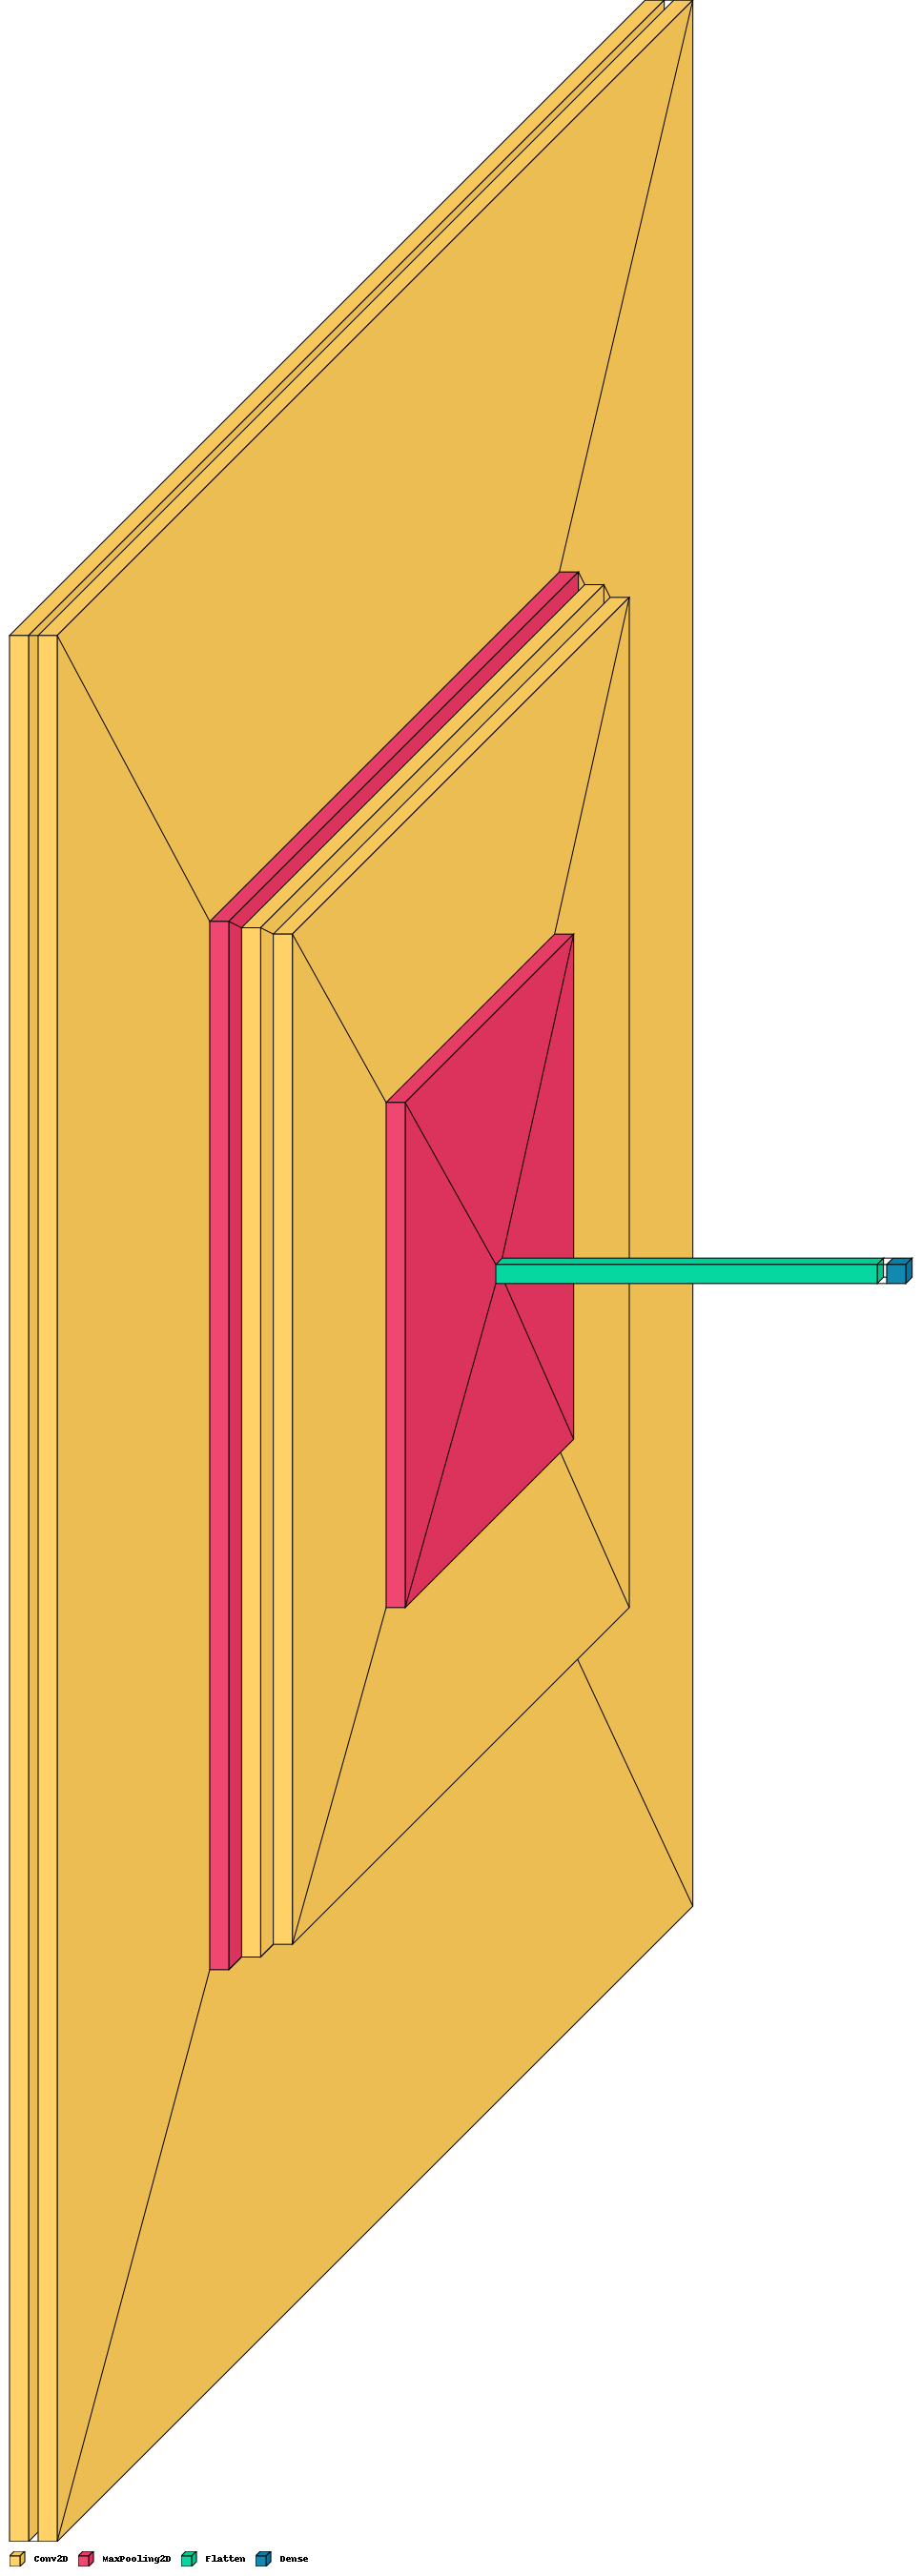

In [ ]:
visualkeras.layered_view(model,scale_xy=10,legend=True)

In [ ]:
efficientnet_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 featue_extraction_layer (K  (None, 1280)              4049564   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 5)                 6405      
                                                                 
Total params: 4055969 (15.47 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 4049564 (15.45 MB)
_________________________________________________________________


In [ ]:
efficientnet_history = efficientnet_model.fit(train_data,
                epochs = 5,
                steps_per_epoch=len(train_data),
                validation_data = test_data,
                validation_steps=len(test_data))

Epoch 1/5
10/10 [==============================] - 49s 4s/step - loss: 1.6252 - accuracy: 0.3077 - val_loss: 1.4228 - val_accuracy: 0.4359
Epoch 2/5
10/10 [==============================] - 34s 4s/step - loss: 1.2589 - accuracy: 0.5385 - val_loss: 1.1949 - val_accuracy: 0.6154
Epoch 3/5
10/10 [==============================] - 35s 4s/step - loss: 1.0256 - accuracy: 0.6506 - val_loss: 1.0493 - val_accuracy: 0.6667
Epoch 4/5
10/10 [==============================] - 29s 3s/step - loss: 0.8703 - accuracy: 0.7308 - val_loss: 0.9384 - val_accuracy: 0.6795
Epoch 5/5
10/10 [==============================] - 34s 3s/step - loss: 0.7609 - accuracy: 0.7981 - val_loss: 0.8850 - val_accuracy: 0.6923


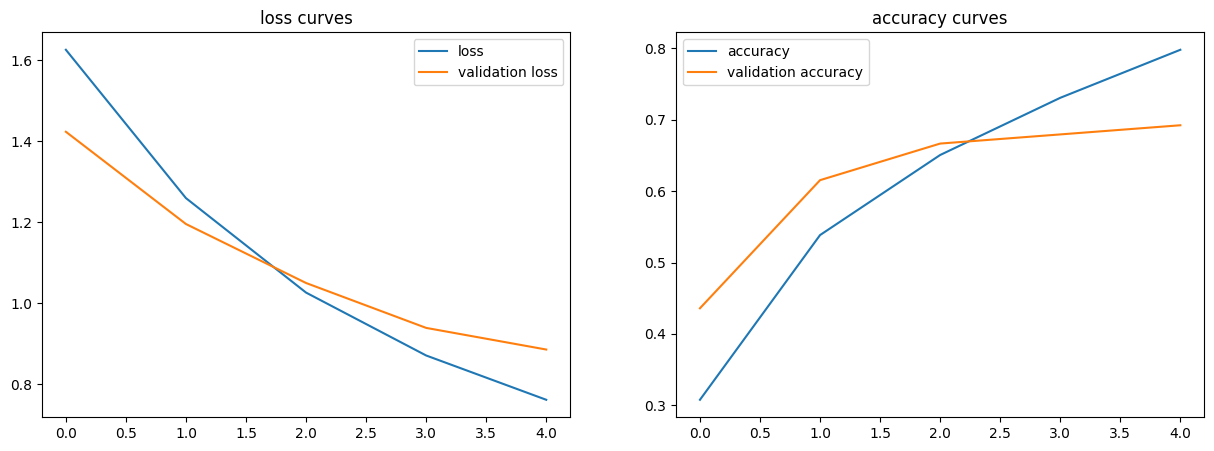

In [ ]:
plot_loss_curve(efficientnet_history)